In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam

from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RandomizedSearchCV

In [2]:
data=pd.read_excel(r"C:\Users\user\Downloads\regression_avito_deals.xlsx")
data.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,deal_probability
0,eb42e711e1c2,c74e8513e90f,Ставропольский край,Ставрополь,Бытовая электроника,Телефоны,iPhone,NaN,NaN,Айфон,"Телефон в отличном состоянии, /\nВсе хорошо ра...",4900.0,1,2017-03-21,Private,0.00000
1,3c047fad4cfc,d37cfffa4e0e,Иркутская область,Иркутск,Услуги,Предложение услуг,"Сад, благоустройство",NaN,NaN,Помощница по саду и огороду,"Прополка, посадка растений, полив, борьба с вр...",350.0,1,2017-03-27,Private,0.25000
2,08d2a8a9a8c8,8e917192017e,Башкортостан,Уфа,Хобби и отдых,Коллекционирование,Картины,NaN,NaN,Икона Николая угодника,"Картины из камней-страз,очень сильно блестят и...",1000.0,67,2017-03-22,Private,0.00000
3,6dcf38216645,e26b8e0a28b5,Самарская область,Самара,Для бизнеса,Оборудование для бизнеса,Другое,NaN,NaN,Станция регенерации blue-R-95,В рабочем состоянии/\n/\nОборудование для запр...,NaN,24,2017-03-15,Private,0.00000
4,eaa000d1719d,f9714a4b15e8,Краснодарский край,Сочи,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,"Телевизор ЖК philips 32""",телевизор PHILIPS 323PFL 7403. В рабочем сос...,12500.0,40,2017-03-18,Company,0.27276


In [3]:
data.describe(include='all')

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,deal_probability
count,751712,751712,751712,751712,751712,751712,720996,424221,320106,751712,693212,7.089790e+05,751712.000000,751712,751712,751712.000000
unique,751712,468590,28,1669,9,47,365,262,1069,425645,663464,NaN,NaN,20,3,NaN
top,eb42e711e1c2,45ba3f23bf25,Краснодарский край,Краснодар,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,Вторичка,Платье,В хорошем состоянии,NaN,NaN,2017-03-27,Private,NaN
freq,1,541,70448,31752,348531,141372,113027,74936,25302,7799,1115,NaN,NaN,57588,537893,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.695741e+05,745.846325,NaN,NaN,0.139447
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.449755e+07,5595.085021,NaN,NaN,0.260362
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+02,9.000000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000e+03,29.000000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+03,88.000000,NaN,NaN,0.151210


In [4]:
data.drop(['item_id','user_id','title','description'],axis=1,inplace=True)

In [5]:
data['activation_date']=pd.to_datetime(data['activation_date'],dayfirst=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9212\3575353510.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['activation_date']=pd.to_datetime(data['activation_date'],dayfirst=True)


In [6]:
data['year']=data['activation_date'].dt.year
data['month']=data['activation_date'].dt.month
data['day']=data['activation_date'].dt.day

In [7]:
data.drop('activation_date',axis=1,inplace=True)

In [8]:
df_cat=data.copy()

In [9]:
result = data.groupby(['region']).agg({'city':['nunique']})
result.columns = ['city_nunique_by_region']
result.reset_index(inplace=True)
    
data = pd.merge(data, result, on='region', how='left')

In [10]:
result = data.groupby(['parent_category_name']).agg({'category_name':['nunique']})
result.columns = ['category_name_nunique_by_parent_category_name']
result.reset_index(inplace=True)
    
data = pd.merge(data, result, on='parent_category_name', how='left')

In [11]:
result = data.groupby(['param_1']).agg({'price':['mean']})
result.columns = ['price_mean_by_param_1']
result.reset_index(inplace=True)
    
data = pd.merge(data, result, on='param_1', how='left')

In [12]:
result = data.groupby(['param_2']).agg({'price':['mean']})
result.columns = ['price_mean_by_param_2']
result.reset_index(inplace=True)
    
data = pd.merge(data, result, on='param_2', how='left')

In [13]:
result = data.groupby(['param_3']).agg({'price':['mean']})
result.columns = ['price_mean_by_param_3']
result.reset_index(inplace=True)
    
data = pd.merge(data, result, on='param_3', how='left')

In [14]:
data.drop(['region','city','category_name','parent_category_name','param_1','param_2','param_3'],axis=1,inplace=True)
data.head()

,price,item_seq_number,user_type,deal_probability,year,month,day,city_nunique_by_region,category_name_nunique_by_parent_category_name,price_mean_by_param_1,price_mean_by_param_2,price_mean_by_param_3
0,4900.0,1,Private,0.00000,2017,3,21,119,9,14202.615863,NaN,NaN
1,350.0,1,Private,0.25000,2017,3,27,55,1,3124.394303,NaN,NaN
2,1000.0,67,Private,0.00000,2017,3,22,86,7,7141.802312,NaN,NaN
3,NaN,24,Private,0.00000,2017,3,15,61,2,58892.355106,NaN,NaN
4,12500.0,40,Company,0.27276,2017,3,18,209,9,8836.319381,NaN,NaN


In [15]:
data.describe(include='all')

,price,item_seq_number,user_type,deal_probability,year,month,day,city_nunique_by_region,category_name_nunique_by_parent_category_name,price_mean_by_param_1,price_mean_by_param_2,price_mean_by_param_3
count,7.089790e+05,751712.000000,751712,751712.000000,751712.0,751712.000000,751712.000000,751712.000000,751712.000000,7.209800e+05,4.242160e+05,3.200950e+05
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,537893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.695741e+05,745.846325,NaN,0.139447,2017.0,3.000008,21.560031,75.931939,5.672303,3.850136e+05,6.473602e+05,3.043048e+05
std,9.449755e+07,5595.085021,NaN,0.260362,0.0,0.002825,4.045879,48.458189,1.740464,1.166348e+06,2.485900e+06,8.070116e+05
min,0.000000e+00,1.000000,NaN,0.000000,2017.0,3.000000,1.000000,25.000000,1.000000,0.000000e+00,2.000000e+02,1.000000e+00
25%,5.000000e+02,9.000000,NaN,0.000000,2017.0,3.000000,18.000000,47.000000,5.000000,3.371793e+03,2.057333e+03,1.328045e+03
50%,1.300000e+03,29.000000,NaN,0.000000,2017.0,3.000000,22.000000,61.000000,5.000000,6.331023e+03,5.947954e+03,3.993775e+03
75%,7.000000e+03,88.000000,NaN,0.151210,2017.0,3.000000,25.000000,86.000000,7.000000,2.093144e+04,3.662635e+04,1.377207e+04


In [16]:
data=pd.get_dummies(data,dtype='int')

In [17]:
df=data.copy()

In [18]:
data.isnull().sum()

price                                             42733
item_seq_number                                       0
deal_probability                                      0
year                                                  0
month                                                 0
day                                                   0
city_nunique_by_region                                0
category_name_nunique_by_parent_category_name         0
price_mean_by_param_1                             30732
price_mean_by_param_2                            327496
price_mean_by_param_3                            431617
user_type_Company                                     0
user_type_Private                                     0
user_type_Shop                                        0
dtype: int64

In [19]:
df_cat.isnull().sum()

region                       0
city                         0
parent_category_name         0
category_name                0
param_1                  30716
param_2                 327491
param_3                 431606
price                    42733
item_seq_number              0
user_type                    0
deal_probability             0
year                         0
month                        0
day                          0
dtype: int64

In [20]:
for i in data.columns:
    data[i]=data[i].fillna(data[i].mode()[0])

In [21]:
for i in df_cat:
    if df_cat[i].dtype=='object':
        df_cat[i]=df_cat[i].fillna('missing_value')

In [22]:
df_cat.isnull().sum()

region                      0
city                        0
parent_category_name        0
category_name               0
param_1                     0
param_2                     0
param_3                     0
price                   42733
item_seq_number             0
user_type                   0
deal_probability            0
year                        0
month                       0
day                         0
dtype: int64

In [23]:
data.isnull().sum()

price                                            0
item_seq_number                                  0
deal_probability                                 0
year                                             0
month                                            0
day                                              0
city_nunique_by_region                           0
category_name_nunique_by_parent_category_name    0
price_mean_by_param_1                            0
price_mean_by_param_2                            0
price_mean_by_param_3                            0
user_type_Company                                0
user_type_Private                                0
user_type_Shop                                   0
dtype: int64

In [24]:
inputs = data.drop('deal_probability', axis=1)
output = data['deal_probability']

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [25]:
inputs_cat = df_cat.drop('deal_probability', axis=1)
outputs_cat = df_cat['deal_probability']

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(inputs_cat, outputs_cat, test_size=0.3, random_state=42)

In [26]:
inputs_ens = df.drop('deal_probability', axis=1)
outputs_ens = df['deal_probability']

X_train_ens, X_test_ens, y_train_ens, y_test_ens = train_test_split(inputs_ens, outputs_ens, test_size=0.3, random_state=42)

In [27]:
a=[]
for i in df_cat.columns:
    if df_cat[i].dtype=='object':
        a.append(i)
a

['region',
 'city',
 'parent_category_name',
 'category_name',
 'param_1',
 'param_2',
 'param_3',
 'user_type']

In [28]:
models = []


xgb_model_def = XGBRegressor(random_state=42)
lgb_model_def = LGBMRegressor(random_state=42)
catboost_model_def = CatBoostRegressor(random_state=42)
catboost_model_custom = CatBoostRegressor(cat_features=a,random_state=42)
regRF = RandomForestRegressor(random_state=42)


models.extend([
    ('XGBoost', xgb_model_def),
    ('LightGBM', lgb_model_def),
    ('CatBoost', catboost_model_def),
    ('CatBoost_Custom', catboost_model_custom),
    ('RandomForest',regRF)
])

In [29]:
def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train metrics
    r2_train = metrics.r2_score(y_train, y_train_pred)

    # Test metrics
    mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
    mse_test = metrics.mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = metrics.r2_score(y_test, y_test_pred)

    print(f'Model Performance for {model_name}')
    print(f'Train R2: {r2_train:.4f}')
    print(f'Test MAE: {mae_test:.4f}')
    print(f'Test MSE: {mse_test:.4f}')
    print(f'Test RMSE: {rmse_test:.4f}')
    print(f'Test R2: {r2_test:.4f}')

    return r2_train, r2_test


In [30]:
r2_df = pd.DataFrame(columns=['Model', 'Train_R2', 'Test_R2'])

for model_name, model in models:
    if model_name == 'CatBoost_Custom':
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    elif model_name=='RandomForest':
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    else:
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_ens, y_train_ens, X_test_ens, y_test_ens)
    if r2_test is not None:
        r2_df = pd.concat([r2_df, pd.DataFrame({'Model': [model_name], 'Train_R2': [r2_train], 'Test_R2': [r2_test]})], ignore_index=True)

# Sort by Test_R2
r2_df_sorted = r2_df.sort_values(by='Test_R2', ascending=False)


Model Performance for XGBoost
Train R2: 0.2294
Test MAE: 0.1570
Test MSE: 0.0539
Test RMSE: 0.2321
Test R2: 0.2093


C:\Users\user\AppData\Local\Temp\ipykernel_9212\2543161816.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  r2_df = pd.concat([r2_df, pd.DataFrame({'Model': [model_name], 'Train_R2': [r2_train], 'Test_R2': [r2_test]})], ignore_index=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 526198, number of used features: 11
[LightGBM] [Info] Start training from score 0.139238
Model Performance for LightGBM
Train R2: 0.2053
Test MAE: 0.1590
Test MSE: 0.0544
Test RMSE: 0.2333
Test R2: 0.2012
Learning rate set to 0.110185
0:	learn: 0.2565838	total: 167ms	remaining: 2m 47s
1:	learn: 0.2537427	total: 197ms	remaining: 1m 38s
2:	learn: 0.2514175	total: 224ms	remaining: 1m 14s
3:	learn: 0.2496836	total: 250ms	remaining: 1m 2s
4:	learn: 0.2480970	total: 276ms	remaining: 54.8s
5:	learn: 0.2468233	total: 300ms	remaining: 49.7s
6:	learn: 0.2458499	total: 326ms	remaining: 46.2s
7:	learn: 0.2450544	total: 353ms	remaining: 43.7s
8:	learn: 0.2443644	total: 378ms	remaining: 

In [31]:
r2_df_sorted

,Model,Train_R2,Test_R2
3,CatBoost_Custom,0.233394,0.219705
2,CatBoost,0.223200,0.212370
0,XGBoost,0.229434,0.209277
1,LightGBM,0.205334,0.201218
4,RandomForest,0.877611,0.146844


In [32]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
         # Using a fraction of the data can help to prevent overfitting and improve generalization.
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5,1),
        'gamma': trial.suggest_int('gamma', 0,5)
        # Increasing the gamma value can help to prevent overfitting
        # Should be used only when you are using high depth
}
    xgb_reg = XGBRegressor(**param)

    auc = cross_val_score(xgb_reg, X_train_ens, y_train_ens, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBRegressor(**best_params)

[I 2025-09-20 10:04:50,981] A new study created in memory with name: no-name-ba875eb9-5eeb-4cbc-afa3-c0d06ac38596
C:\Users\user\AppData\Local\Temp\ipykernel_9212\2973524924.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\user\AppData\Local\Temp\ipykernel_9212\2973524924.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
C:\Users\user\AppData\Local\Temp\ipykernel_9212\2973524924.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

Best trial:
  Value: 0.182
  Params:  {'n_estimators': 710, 'learning_rate': 0.27910922160766904, 'max_depth': 9, 'subsample': 0.719550238366252, 'colsample_bytree': 0.6677679519402432, 'gamma': 2}


In [33]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100)
    }

    lgb_reg = LGBMRegressor(**param)

    auc = cross_val_score(lgb_reg, X_train_ens, y_train_ens, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMRegressor(**best_params)

[I 2025-09-20 10:05:12,646] A new study created in memory with name: no-name-88b0644c-ff42-472a-a2e8-09689b6c37f1
C:\Users\user\AppData\Local\Temp\ipykernel_9212\2619070044.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2025-09-20 10:05:23,895] Trial 0 finished with value: 0.20541595537733312 and parameters: {'n_estimators': 554, 'learning_rate': 0.3394666790291787, 'max_depth': 3, 'num_leaves': 17}. Best is trial 0 with value: 0.20541595537733312.


Best trial:
  Value: 0.205
  Params:  {'n_estimators': 554, 'learning_rate': 0.3394666790291787, 'max_depth': 3, 'num_leaves': 17}


In [34]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        # 'cat_features': [],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['RMSE']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_reg = CatBoostRegressor(**param)

    auc = cross_val_score(cb_reg, X_train_ens, y_train_ens, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostRegressor(**best_params)

[I 2025-09-20 10:05:23,918] A new study created in memory with name: no-name-c9ea40c7-ff0f-43c6-aaf7-601fd3b19e34
C:\Users\user\AppData\Local\Temp\ipykernel_9212\3361800920.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\user\AppData\Local\Temp\ipykernel_9212\3361800920.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2025-09-20 10:06:07,338] Trial 0 finished with value: 0.16655071303423022 and parameters: {'iterations': 749, 'learni

Best trial:
  Value: 0.167
  Params:  {'iterations': 749, 'learning_rate': 0.010004412479920946, 'depth': 6, 'l2_leaf_reg': 3.8516226295690976, 'loss_function': 'RMSE'}


In [39]:
def best_params_for_model(trial):

    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
       'max_features': trial.suggest_loguniform('max_features', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
      'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5,10)
    }

    rf_reg = RandomForestRegressor(**param)

    auc = cross_val_score(regRF, X_train, y_train, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model = RandomForestRegressor(**best_params)

[I 2025-09-20 10:10:40,776] A new study created in memory with name: no-name-bbed6bae-c605-4664-ba0c-7916791e8fb5
C:\Users\user\AppData\Local\Temp\ipykernel_9212\1675930631.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'max_features': trial.suggest_loguniform('max_features', 0.01, 1.0),
[I 2025-09-20 10:13:46,422] Trial 0 finished with value: 0.13933454400836018 and parameters: {'n_estimators': 427, 'max_features': 0.7979338839004988, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.13933454400836018.


Best trial:
  Value: 0.139
  Params:  {'n_estimators': 427, 'max_features': 0.7979338839004988, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 10}


In [40]:
models_optimized = []

models_optimized.extend([
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model),
    ('RandomForest Optuna',best_rf_model)
])

In [41]:
r2_df_optuna = pd.DataFrame(columns=['Model', 'Train_R2', 'Test_R2'])

for model_name, model in models_optimized:
    if model_name=='RandomForest Optuna':
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    else:
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_ens, y_train_ens, X_test_ens, y_test_ens)
    if r2_test is not None:
        r2_df_optuna = pd.concat([r2_df_optuna, pd.DataFrame({
            'Model': [model_name],
            'Train_R2': [r2_train],
            'Test_R2': [r2_test]
        })], ignore_index=True)

r2_df_sorted_optuna = r2_df_optuna.sort_values(by='Test_R2', ascending=False)


Model Performance for XGBoost Optuna
Train R2: 0.1899
Test MAE: 0.1611
Test MSE: 0.0553
Test RMSE: 0.2351
Test R2: 0.1884


C:\Users\user\AppData\Local\Temp\ipykernel_9212\3113538785.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  r2_df_optuna = pd.concat([r2_df_optuna, pd.DataFrame({


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 526198, number of used features: 11
[LightGBM] [Info] Start training from score 0.139238
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [42]:

r2_df_sorted_optuna


,Model,Train_R2,Test_R2
1,LightGBM Optuna,0.216934,0.209398
3,RandomForest Optuna,0.197976,0.188911
0,XGBoost Optuna,0.189889,0.188423
2,CatBoost Optuna,0.168032,0.167223


In [43]:
final_review = pd.concat([r2_df_sorted,r2_df_sorted_optuna], axis=0)

final_review_sorted = final_review.sort_values(by='Test_R2', ascending=False)
final_review_sorted.reset_index(drop=True, inplace=True)

final_review_sorted

,Model,Train_R2,Test_R2
0,CatBoost_Custom,0.233394,0.219705
1,CatBoost,0.223200,0.212370
2,LightGBM Optuna,0.216934,0.209398
3,XGBoost,0.229434,0.209277
4,LightGBM,0.205334,0.201218
5,RandomForest Optuna,0.197976,0.188911
6,XGBoost Optuna,0.189889,0.188423
7,CatBoost Optuna,0.168032,0.167223
8,RandomForest,0.877611,0.146844


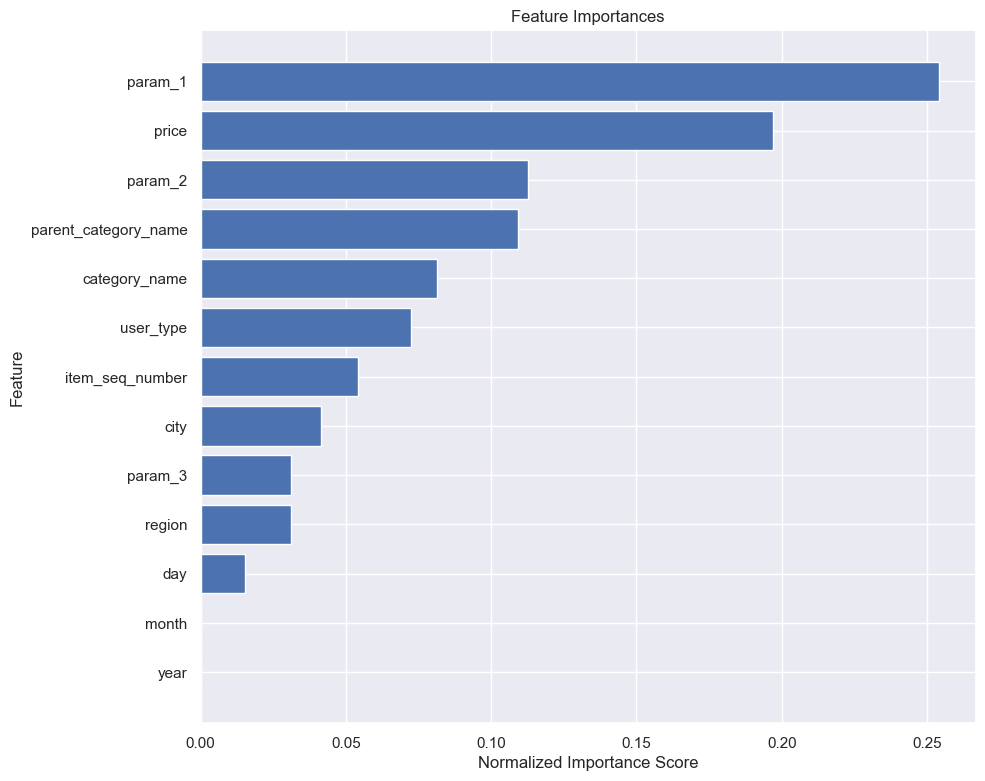

In [44]:
importances =catboost_model_custom.feature_importances_


importances = importances / importances.sum()

importance_df = pd.DataFrame({
        'Feature':  X_train_cat.columns,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 9))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances")
plt.xlabel("Normalized Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

In [45]:
importance_df

,Feature,Importance
4,param_1,0.254042
7,price,0.196931
5,param_2,0.112722
2,parent_category_name,0.109404
3,category_name,0.081429
9,user_type,0.072386
8,item_seq_number,0.054166
1,city,0.041512
6,param_3,0.031064
0,region,0.030935


In [46]:
# Extract features with importance between 1%-35%
important_features_df = importance_df[importance_df['Importance'] > 0.01]

print("Features with Importance > 1%:")
important_features_df

Features with Importance > 1%:


,Feature,Importance
4,param_1,0.254042
7,price,0.196931
5,param_2,0.112722
2,parent_category_name,0.109404
3,category_name,0.081429
9,user_type,0.072386
8,item_seq_number,0.054166
1,city,0.041512
6,param_3,0.031064
0,region,0.030935


In [47]:
important_features_df.Feature.tolist()

['param_1',
 'price',
 'param_2',
 'parent_category_name',
 'category_name',
 'user_type',
 'item_seq_number',
 'city',
 'param_3',
 'region',
 'day']

SHAP Values Summary (Selected Features)


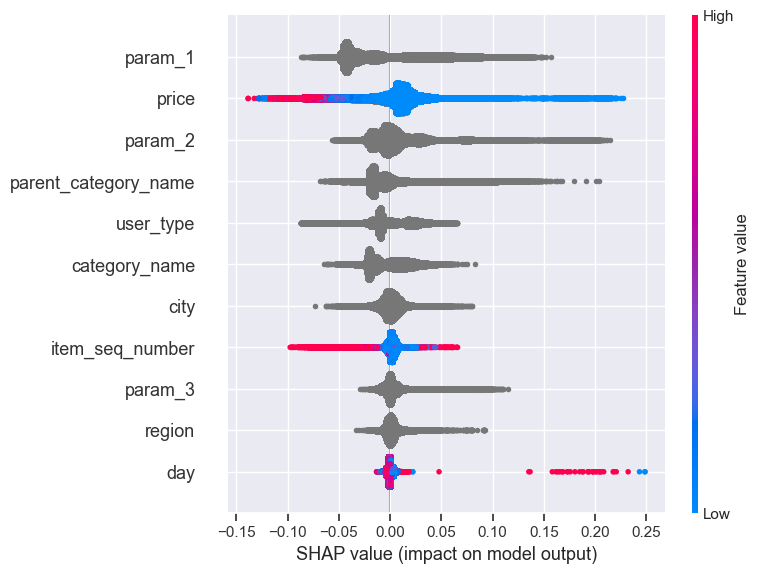

In [49]:
import shap

selected_features = ['param_1',
 'price',
 'param_2',
 'parent_category_name',
 'category_name',
 'user_type',
 'item_seq_number',
 'city',
 'param_3',
 'region',
 'day']


explainer = shap.TreeExplainer(catboost_model_custom)
shap_values = explainer.shap_values(X_train_cat)

shap_df = pd.DataFrame(shap_values, columns=X_train_cat.columns)
shap_selected = shap_df[selected_features]
X_selected = X_train_cat[selected_features]


print("SHAP Values Summary (Selected Features)")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_selected.values, X_selected, show=False)
plt.tight_layout()
plt.show()

In [50]:
new_inputs = important_features_df['Feature'].tolist()

new_inputs

['param_1',
 'price',
 'param_2',
 'parent_category_name',
 'category_name',
 'user_type',
 'item_seq_number',
 'city',
 'param_3',
 'region',
 'day']

In [52]:
fin_input = df_cat[important_features_df['Feature'].tolist()]
fin_output =df_cat['deal_probability']

X_train_fin, X_test_fin, y_train_fin, y_test_fin = train_test_split(fin_input, fin_output, test_size=0.3, random_state=42)

model_fin = catboost_model_custom.fit(X_train_fin,y_train_fin)


Learning rate set to 0.110185
0:	learn: 0.2559625	total: 229ms	remaining: 3m 48s
1:	learn: 0.2525942	total: 484ms	remaining: 4m 1s
2:	learn: 0.2498516	total: 637ms	remaining: 3m 31s
3:	learn: 0.2475153	total: 793ms	remaining: 3m 17s
4:	learn: 0.2457302	total: 1.02s	remaining: 3m 22s
5:	learn: 0.2442242	total: 1.13s	remaining: 3m 7s
6:	learn: 0.2429148	total: 1.27s	remaining: 3m
7:	learn: 0.2418510	total: 1.46s	remaining: 3m 1s
8:	learn: 0.2409209	total: 1.65s	remaining: 3m 1s
9:	learn: 0.2401464	total: 1.88s	remaining: 3m 6s
10:	learn: 0.2395160	total: 2.05s	remaining: 3m 4s
11:	learn: 0.2390156	total: 2.24s	remaining: 3m 4s
12:	learn: 0.2385976	total: 2.54s	remaining: 3m 12s
13:	learn: 0.2382334	total: 2.74s	remaining: 3m 13s
14:	learn: 0.2379414	total: 2.92s	remaining: 3m 11s
15:	learn: 0.2376919	total: 3.11s	remaining: 3m 11s
16:	learn: 0.2374236	total: 3.38s	remaining: 3m 15s
17:	learn: 0.2371289	total: 3.64s	remaining: 3m 18s
18:	learn: 0.2369125	total: 3.89s	remaining: 3m 20s
19:

In [53]:
y_train_pred = model_fin.predict(X_train_fin)
y_test_pred = model_fin.predict(X_test_fin)

# Train metrics
r2_train = metrics.r2_score(y_train_fin, y_train_pred)

# Test metrics
r2_test = metrics.r2_score(y_test_fin, y_test_pred)

print(f'Train R2: {r2_train:.4f}')
print(f'Test R2: {r2_test:.4f}')

Train R2: 0.2334
Test R2: 0.2198


In [54]:

scaler = StandardScaler()
scaler.fit(inputs)

scaled = scaler.transform(inputs)

inputs_scaled = pd.DataFrame(scaled, columns=inputs.columns)

inputs_scaled

,price,item_seq_number,year,month,day,city_nunique_by_region,category_name_nunique_by_parent_category_name,price_mean_by_param_1,price_mean_by_param_2,price_mean_by_param_3,user_type_Company,user_type_Private,user_type_Shop
0,-0.003745,-0.133125,0.0,-0.002825,-0.138420,0.888768,1.911961,-0.310359,-0.192205,0.781201,-0.548135,0.630486,-0.237527
1,-0.003795,-0.133125,0.0,-0.002825,1.344571,-0.431959,-2.684517,-0.320036,-0.192205,0.781201,-0.548135,0.630486,-0.237527
2,-0.003788,-0.121329,0.0,-0.002825,0.108745,0.207768,0.762841,-0.316527,-0.192205,0.781201,-0.548135,0.630486,-0.237527
3,-0.003793,-0.129014,0.0,-0.002825,-1.621412,-0.308141,-2.109957,-0.271319,-0.192205,0.781201,-0.548135,0.630486,-0.237527
4,-0.003662,-0.126155,0.0,-0.002825,-0.879916,2.746041,1.911961,-0.315047,-0.192205,0.781201,1.824368,-1.586079,-0.237527
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751707,-0.003782,-0.132946,0.0,-0.002825,1.344571,-0.803414,-0.386278,-0.318345,-0.190152,-1.293248,-0.548135,0.630486,-0.237527
751708,-0.003794,-0.116325,0.0,-0.002825,0.355910,-0.163686,-0.386278,-0.318401,-0.192837,-1.294962,1.824368,-1.586079,-0.237527
751709,-0.003797,-0.129551,0.0,-0.002825,-0.385585,-0.865323,-0.386278,-0.321273,-0.192205,0.781201,-0.548135,0.630486,-0.237527
751710,-0.003793,-0.132232,0.0,-0.002825,1.591736,-0.927232,-0.386278,-0.318401,-0.192205,-1.294687,-0.548135,0.630486,-0.237527


In [56]:
from sklearn.model_selection import train_test_split

X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(inputs_scaled, output, test_size=0.2, random_state=42)

In [57]:
def create_model(trial):
    # Building artificial neural network
    model = Sequential()

     # we add 2 hidden layers and 1 output layer
    model.add(Dense(units=trial.suggest_int('units_layer1', 6, 32), activation='relu'))
    model.add(Dense(units=trial.suggest_int('units_layer2', 6, 32), activation='relu'))
    model.add(Dense(units=1, activation='relu'))

    # Suggest hyperparameters for the optimizer
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'adagrad':
        optimizer = Adagrad(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])
    
    return model

In [58]:
def optimal(trial):
    
    # Suggest the number of epochs and batch size
    epochs = trial.suggest_int('epochs', 10, 50)
    batch_size = trial.suggest_int('batch_size', 16, 64)
    
    model = create_model(trial)
    
    history = model.fit(X_train_ann, y_train_ann, epochs=epochs, batch_size=batch_size)
    
    y_pred = model.predict(X_test_ann)
    r2_test=metrics.r2_score(y_test_ann, y_pred)
    
    return r2_test


study = optuna.create_study(direction='maximize')
study.optimize(optimal, n_trials=3)

print(f"Best trial: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_trial.params}")

[I 2025-09-20 10:33:27,350] A new study created in memory with name: no-name-93168a4c-7b17-4d82-af97-829de65e3c1f
C:\Users\user\AppData\Local\Temp\ipykernel_9212\4172980634.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


Epoch 1/25
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 0.1396 - mae: 0.1396
Epoch 2/25
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.1390 - mae: 0.1390
Epoch 3/25
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.1391 - mae: 0.1391
Epoch 4/25
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 0.1398 - mae: 0.1398
Epoch 5/25
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.1389 - mae: 0.1389
Epoch 6/25
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 0.1388 - mae: 0.1388
Epoch 7/25
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 0.1383 - mae: 0.1383
Epoch 8/25
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 0.1382 - mae: 0.1382
Epoch 9/25
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.1389 - mae: 0.1389
Epoch 10/25
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.1383 - mae: 0.1383
Epoch 11/25
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 0.1384 - mae: 0.1384
Epoch 12/25
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms

[I 2025-09-20 10:40:32,180] Trial 0 finished with value: -0.26776789925416433 and parameters: {'epochs': 25, 'batch_size': 40, 'units_layer1': 19, 'units_layer2': 17, 'optimizer': 'sgd', 'learning_rate': 0.0021017737233226244}. Best is trial 0 with value: -0.26776789925416433.


Epoch 1/32


C:\Users\user\AppData\Local\Temp\ipykernel_9212\4172980634.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


35375/35375 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - loss: 0.1406 - mae: 0.1406
Epoch 2/32
35375/35375 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - loss: 0.1376 - mae: 0.1376
Epoch 3/32
35375/35375 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - loss: 0.1355 - mae: 0.1355
Epoch 4/32
35375/35375 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 0.1344 - mae: 0.1344
Epoch 5/32
35375/35375 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - loss: 0.1340 - mae: 0.1340
Epoch 6/32
35375/35375 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 0.1344 - mae: 0.1344
Epoch 7/32
35375/35375 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step - loss: 0.1340 - mae: 0.1340
Epoch 8/32
35375/35375 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - loss: 0.1336 - mae: 0.1336
Epoch 9/32
35375/35375 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 0.1326 - mae: 0.1326
Epoch 10/32
35375/35375 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.1330 - mae: 0.1330
Epoch 11/32
35375/35375 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 0.1325 - mae: 0.1325
Epoch 12/32
35375/35375 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - los

[I 2025-09-20 11:04:31,336] Trial 1 finished with value: -0.12460073102784563 and parameters: {'epochs': 32, 'batch_size': 17, 'units_layer1': 7, 'units_layer2': 29, 'optimizer': 'adam', 'learning_rate': 2.331885669820024e-05}. Best is trial 1 with value: -0.12460073102784563.


Epoch 1/11


C:\Users\user\AppData\Local\Temp\ipykernel_9212\4172980634.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


15035/15035 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 0.1391 - mae: 0.1391
Epoch 2/11
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 0.1397 - mae: 0.1397
Epoch 3/11
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.1389 - mae: 0.1389
Epoch 4/11
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.1392 - mae: 0.1392
Epoch 5/11
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.1393 - mae: 0.1393
Epoch 6/11
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.1387 - mae: 0.1387
Epoch 7/11
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 0.1391 - mae: 0.1391
Epoch 8/11
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 0.1392 - mae: 0.1392
Epoch 9/11
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 0.1387 - mae: 0.1387
Epoch 10/11
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 0.1391 - mae: 0.1391
Epoch 11/11
15035/15035 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 0.1395 - mae: 0.1395
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 3s 694us/step


[I 2025-09-20 11:08:34,043] Trial 2 finished with value: -0.2878378379882749 and parameters: {'epochs': 11, 'batch_size': 40, 'units_layer1': 14, 'units_layer2': 25, 'optimizer': 'adam', 'learning_rate': 0.004111337817954428}. Best is trial 1 with value: -0.12460073102784563.


Best trial: -0.12460073102784563
Best hyperparameters: {'epochs': 32, 'batch_size': 17, 'units_layer1': 7, 'units_layer2': 29, 'optimizer': 'adam', 'learning_rate': 2.331885669820024e-05}


In [59]:
best_params = study.best_trial.params

best_params

{'epochs': 32,
 'batch_size': 17,
 'units_layer1': 7,
 'units_layer2': 29,
 'optimizer': 'adam',
 'learning_rate': 2.331885669820024e-05}

In [60]:
# Train the final model with the best hyperparameters

best_model = Sequential()
best_model.add(Dense(units=best_params['units_layer1'], activation='relu'))
best_model.add(Dense(units=best_params['units_layer2'], activation='relu'))
best_model.add(Dense(1, activation='relu'))

In [61]:
if best_params['optimizer'] == 'adam':
    best_optimizer = Adam(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'sgd':
    best_optimizer = SGD(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'rmsprop':
    best_optimizer = RMSprop(learning_rate=best_params['learning_rate'])
elif best_params['optimizer'] == 'adagrad':
    best_optimizer = Adagrad(learning_rate=best_params['learning_rate'])


In [62]:
best_model.compile(optimizer=best_optimizer, loss='mae', metrics=['mae'])

In [66]:
from sklearn import metrics

def evaluate(model, X_train, X_test, y_train, y_test):
    
    y_pred = model.predict(X_test)
    
    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = metrics.r2_score(y_test, y_pred)


    y_pred_train = model.predict(X_train)

    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)


    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)

In [67]:
evaluate(best_model,X_train_ann, X_test_ann, y_train_ann, y_test_ann)

4699/4699 ━━━━━━━━━━━━━━━━━━━━ 2s 472us/step
18793/18793 ━━━━━━━━━━━━━━━━━━━━ 9s 458us/step
  Metric       Train        Test
0    MAE    0.306450    0.308286
1    MSE    0.234005    0.185549
2   RMSE    0.483740    0.430755
3     R2 -245.753953 -171.971362
